## PROBLEM STATEMENT : Predictive wheather a customer is eligible for taking loan.

DOMAIN ANALYSIS

SK_ID_CURR:  Unique customer/application ID

NAME_CONTRACT_TYPE: Type of loan

AMT_CREDIT: Total loan amount requested

AMT_ANNUITY: Monthly EMI amount

AMT_INCOME_TOTAL: Customer’s total annual income

CNT_CHILDREN: Number of dependent children

CODE_GENDER: Gender of applicant

FLAG_OWN_CAR: Y → owns a car, N → no car

FLAG_OWN_REALTY: Owns house/property or not

FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21: Whether customer submitted specific documents
1 → document submitted
0 → not submitted

AMT_REQ_CREDIT_BUREAU_HOUR: Loan enquiries in last 1 hour
AMT_REQ_CREDIT_BUREAU_DAY: In last 1 day
AMT_REQ_CREDIT_BUREAU_WEEK: In last week
AMT_REQ_CREDIT_BUREAU_MON: In last month
AMT_REQ_CREDIT_BUREAU_QRT: In last 3 months
AMT_REQ_CREDIT_BUREAU_YEAR: In last year

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("application_train.csv")


In [3]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [5]:
data.shape

(307511, 122)

In [6]:
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
(data == 'unknown').sum()


SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [8]:
bureau_cols = [
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

data[bureau_cols] = data[bureau_cols].fillna(0)


In [9]:
data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

EDA

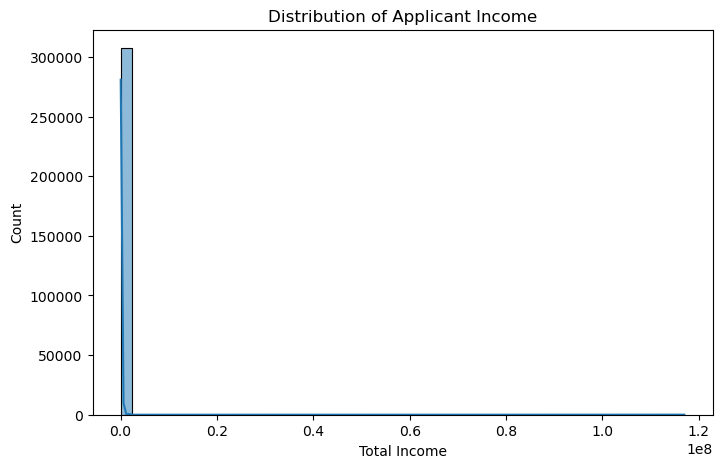

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(data['AMT_INCOME_TOTAL'], bins=50, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Total Income')
plt.ylabel('Count')
plt.show()


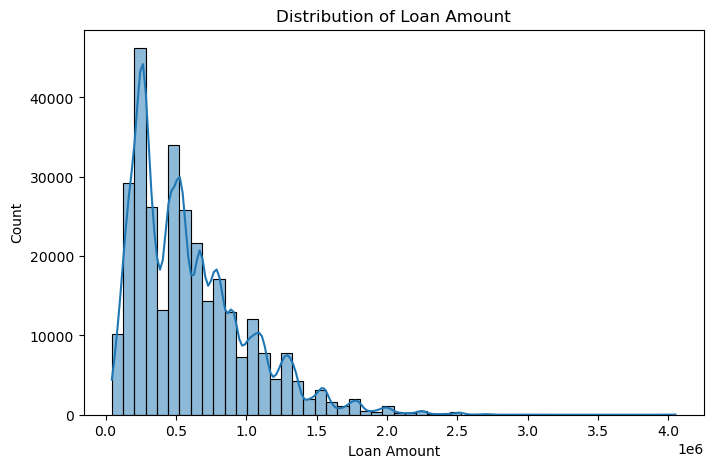

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data['AMT_CREDIT'], bins=50, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()


The loan amount distribution shows a wide range of values, with most applicants requesting moderate loan amounts, while a smaller segment applies for very high credit amounts.

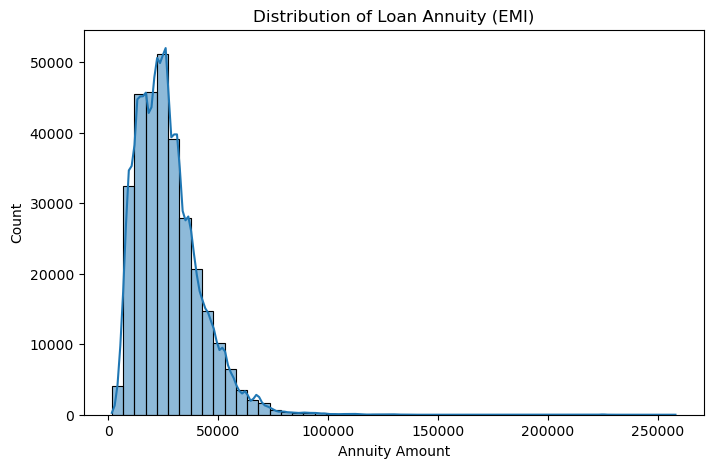

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data['AMT_ANNUITY'], bins=50, kde=True)
plt.title('Distribution of Loan Annuity (EMI)')
plt.xlabel('Annuity Amount')
plt.ylabel('Count')
plt.show()


Most applicants have relatively lower monthly annuity amounts, suggesting manageable EMI levels, though some high EMI outliers may indicate potential repayment stres

UNIVARIANT

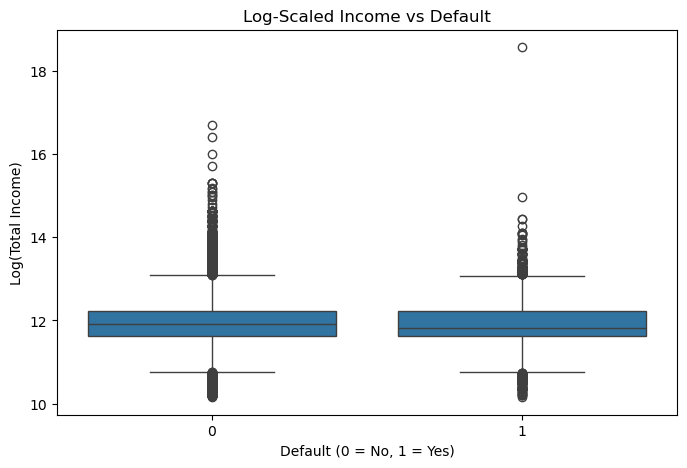

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['TARGET'], y=np.log1p(data['AMT_INCOME_TOTAL']))
plt.title('Log-Scaled Income vs Default')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Log(Total Income)')
plt.show()


The median income of non-defaulters is slightly higher than that of defaulters.
This suggests that lower income levels are associated with increased risk of loan default, although income alone does not fully separate the two groups.

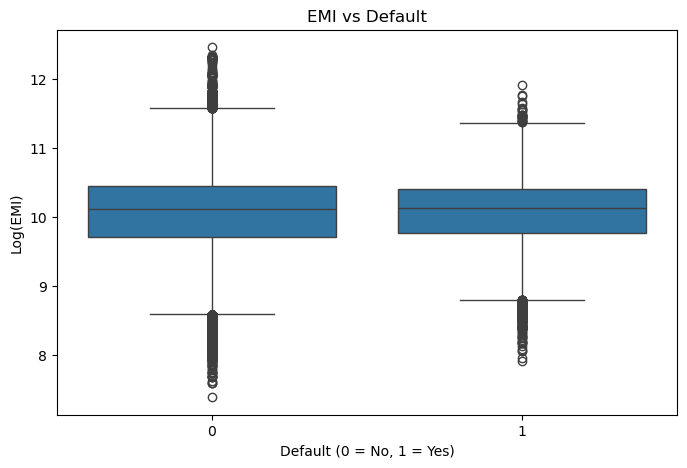

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['TARGET'], y=np.log1p(data['AMT_ANNUITY']))
plt.title('EMI vs Default')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Log(EMI)')
plt.show()


The median EMI for defaulters is slightly higher than that of non-defaulters, indicating that customers with higher monthly repayment obligations are more likely to default due to increased financial pressure

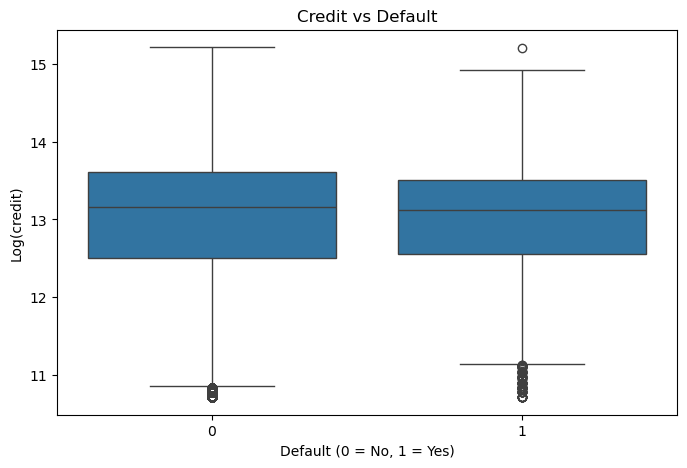

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['TARGET'], y=np.log1p(data['AMT_CREDIT']))
plt.title('Credit vs Default')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Log(credit)')
plt.show()

The median loan amount of non-defaulters is slightly higher than that of defaulters. This indicates that loan amount alone does not determine default risk, and customers with higher loans may still repay successfully when supported by sufficient income.

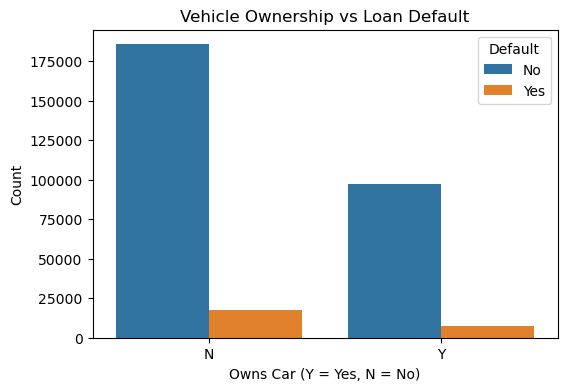

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=data)
plt.title('Vehicle Ownership vs Loan Default')
plt.xlabel('Owns Car (Y = Yes, N = No)')
plt.ylabel('Count')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()


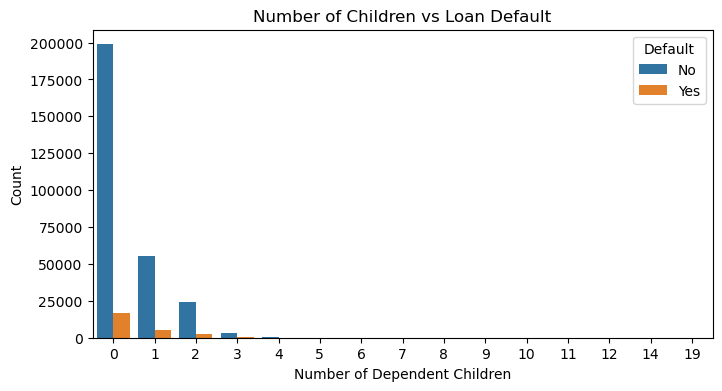

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(x='CNT_CHILDREN', hue='TARGET', data=data)
plt.title('Number of Children vs Loan Default')
plt.xlabel('Number of Dependent Children')
plt.ylabel('Count')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()


In [19]:
data1 = pd.read_csv("bureau.csv")


In [20]:
data1.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau.csv = Customer’s past credit history from other banks

SK_ID_CURR: Customer ID
CREDIT_ACTIVE:Status of previous loan
CREDIT_CURRENCY: currency of loan
DAYS_CREDIT: Days since the previous loan was taken
DAYS_CREDIT_ENDDATE: Expected loan end date
DAYS_ENDDATE_FACT: Actual loan end date
DAYS_CREDIT_UPDATE:Last time bureau record was updated
CREDIT_DAY_OVERDUE:Number of days payment was overdue
AMT_CREDIT_MAX_OVERDUE:Maximum overdue amount ever
CNT_CREDIT_PROLONG:Number of times loan tenure was extended
AMT_CREDIT_SUM:Total loan amount
AMT_CREDIT_SUM_DEBT: Remaining unpaid amount
AMT_CREDIT_SUM_OVERDUE: Amount currently overdue


The bureau dataset contains historical credit information of applicants from external financial institutions. Since a customer can have multiple past loans, the dataset has a one-to-many relationship with the application data. Therefore, bureau-level features were aggregated at the customer level before merging using the common key SK_ID_CURR.


In [21]:
bureau_agg = data1.groupby("SK_ID_CURR").agg(
    total_prev_loans = ("SK_ID_BUREAU", "count"),
    active_loans = ("CREDIT_ACTIVE", lambda x: (x == "Active").sum()),
    avg_credit_amount = ("AMT_CREDIT_SUM", "mean"),
    total_credit_debt = ("AMT_CREDIT_SUM_DEBT", "sum"),
    max_overdue_days = ("CREDIT_DAY_OVERDUE", "max")
).reset_index()


In [22]:
data = data.merge(
    bureau_agg,
    on="SK_ID_CURR",
    how="left"
)


In [23]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,total_prev_loans,active_loans,avg_credit_amount,total_credit_debt,max_overdue_days
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,8.0,2.0,108131.945625,245781.00,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,254350.125000,0.00,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,94518.900000,0.00,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,146250.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,0.0,1.0,0.0,1.0,4.0,2.0,990000.000000,1795833.00,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45000.000000,0.00,0.0


In [24]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,total_prev_loans,active_loans,avg_credit_amount,total_credit_debt,max_overdue_days
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,8.0,2.0,108131.945625,245781.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,254350.125000,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,94518.900000,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,146250.000000,0.0,0.0


In [25]:
bureau_cols = [
    "total_prev_loans",
    "active_loans",
    "avg_credit_amount",
    "total_credit_debt",
    "max_overdue_days"
]

data[bureau_cols] = data[bureau_cols].fillna(0)


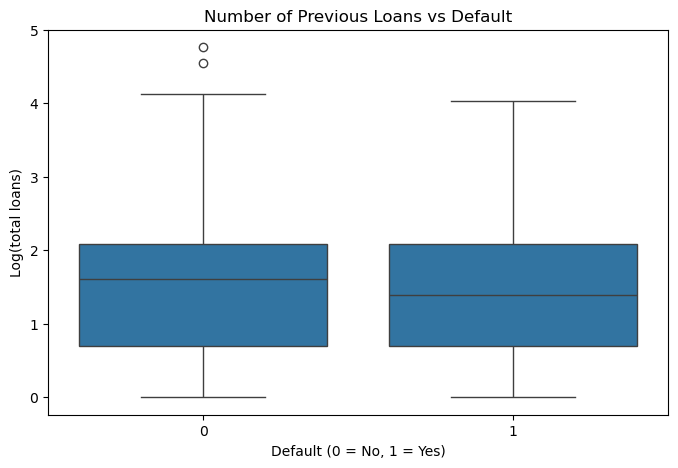

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x="TARGET", y=np.log1p(data["total_prev_loans"]), data=data)
plt.title("Number of Previous Loans vs Default")
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Log(total loans)')
plt.show()

The boxplot shows that non-defaulters have a higher median number of previous loans. This indicates that customers with a longer and successful credit history are less likely to default. Hence, the number of previous loans is an important indicator of creditworthiness rather than risk by itself

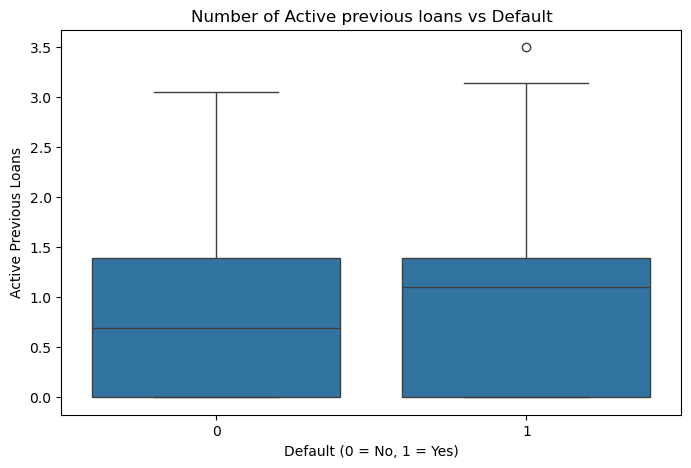

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x="TARGET", y=np.log1p(data["active_loans"]), data=data)
plt.title("Number of Active previous loans vs Default")
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Active Previous Loans')
plt.show()

Defaulters tend to have marginally more active loans than non-defaulters, but the large overlap suggests this feature is a weak standalone predictor.

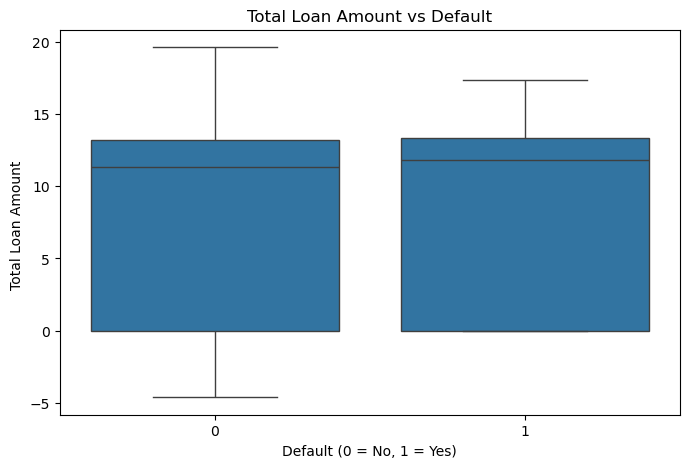

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x="TARGET", y=np.log1p(data["total_credit_debt"]), data=data)
plt.title("Total Loan Amount vs Default")
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel("Total Loan Amount ")
plt.show()

Defaulters exhibit a higher median outstanding credit debt compared to non-defaulters, indicating that customers with larger existing repayment obligations are more likely to default. This highlights outstanding debt as a strong risk indicator.


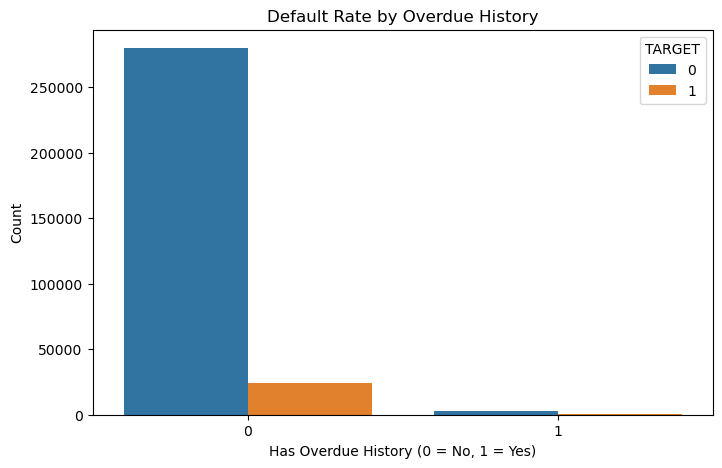

In [29]:
data["has_overdue"] = (data["max_overdue_days"] > 0).astype(int)

plt.figure(figsize=(8,5))
sns.countplot(x="has_overdue", hue="TARGET", data=data)
plt.title("Default Rate by Overdue History")
plt.xlabel("Has Overdue History (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [30]:
prev = pd.read_csv("previous_application.csv")

In [31]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


The previous_application.csv dataset contains information about applicants’ past loan applications submitted to the same financial institution


NAME_CONTRACT_STATUS: Outcome of previous application
AMT_APPLICATION: Loan amount requested in the previous application
AMT_CREDIT: Loan amount actually approved
AMT_ANNUITY: Monthly EMI for the previous loan
AMT_DOWN_PAYMENT:Initial payment made by the customer
AMT_GOODS_PRICE: Price of goods purchased 
WEEKDAY_APPR_PROCESS_START: Day of the week when the application was submitted
HOUR_APPR_PROCESS_START: Hour of the day when application started
CNT_PAYMENT: Number of installments for repayment
NAME_YIELD_GROUP:Interest rate category of the loan
PRODUCT_COMBINATION:Combination of loan type and repayment method
NAME_SELLER_INDUSTRY:Industry of the seller

In [32]:
prev = pd.read_csv("previous_application.csv")

prev_agg = prev.groupby("SK_ID_CURR").agg(
    total_prev_apps = ("SK_ID_PREV", "count"),
    approved_apps = ("NAME_CONTRACT_STATUS", lambda x: (x == "Approved").sum()),
    rejected_apps = ("NAME_CONTRACT_STATUS", lambda x: (x == "Refused").sum()),
    avg_prev_credit = ("AMT_CREDIT", "mean"),
    avg_prev_annuity = ("AMT_ANNUITY", "mean")
).reset_index()


In [33]:
data = data.merge(prev_agg, on="SK_ID_CURR", how="left")


In [34]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,active_loans,avg_credit_amount,total_credit_debt,max_overdue_days,has_overdue,total_prev_apps,approved_apps,rejected_apps,avg_prev_credit,avg_prev_annuity
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,108131.945625,245781.00,0.0,0,1.0,1.0,0.0,179055.00,9251.775000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,254350.125000,0.00,0.0,0,3.0,3.0,0.0,484191.00,56553.990000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,94518.900000,0.00,0.0,0,1.0,1.0,0.0,20106.00,5357.250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.000000,0.00,0.0,0,9.0,5.0,1.0,291695.50,23651.175000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,146250.000000,0.00,0.0,0,6.0,6.0,0.0,166638.75,12278.805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.000000,0.00,0.0,0,1.0,1.0,0.0,40455.00,6605.910000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.000000,0.00,0.0,0,1.0,1.0,0.0,56821.50,10074.465000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,2.0,990000.000000,1795833.00,0.0,0,2.0,2.0,0.0,20625.75,4770.405000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,45000.000000,0.00,0.0,0,2.0,2.0,0.0,134439.75,10681.132500


In [35]:

prev_cols = [
    "total_prev_apps",
    "approved_apps",
    "rejected_apps",
    "avg_prev_credit",
    "avg_prev_annuity"
]

data[prev_cols] = data[prev_cols].fillna(0)


In [36]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,active_loans,avg_credit_amount,total_credit_debt,max_overdue_days,has_overdue,total_prev_apps,approved_apps,rejected_apps,avg_prev_credit,avg_prev_annuity
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,108131.945625,245781.00,0.0,0,1.0,1.0,0.0,179055.00,9251.775000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,254350.125000,0.00,0.0,0,3.0,3.0,0.0,484191.00,56553.990000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,94518.900000,0.00,0.0,0,1.0,1.0,0.0,20106.00,5357.250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.000000,0.00,0.0,0,9.0,5.0,1.0,291695.50,23651.175000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,146250.000000,0.00,0.0,0,6.0,6.0,0.0,166638.75,12278.805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.000000,0.00,0.0,0,1.0,1.0,0.0,40455.00,6605.910000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.000000,0.00,0.0,0,1.0,1.0,0.0,56821.50,10074.465000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,2.0,990000.000000,1795833.00,0.0,0,2.0,2.0,0.0,20625.75,4770.405000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,45000.000000,0.00,0.0,0,2.0,2.0,0.0,134439.75,10681.132500


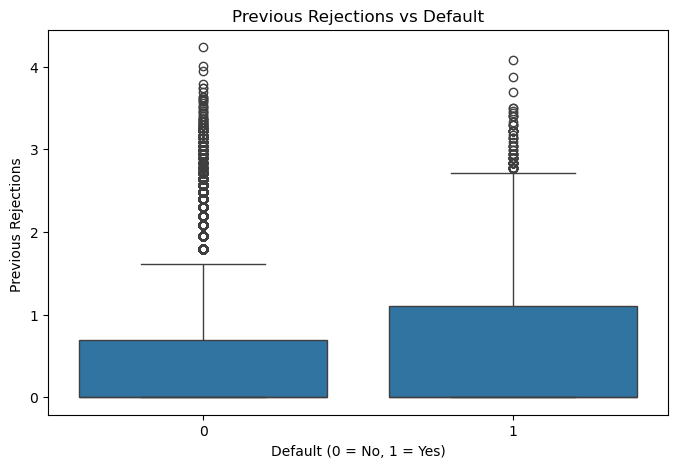

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x="TARGET", y=np.log1p(data["rejected_apps"]), data=data)
plt.title("Previous Rejections vs Default")
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel("Previous Rejections ")
plt.show()

Defaulters exhibit a higher median number of previously rejected loan applications compared to non-defaulters. This suggests that customers with a history of repeated loan rejections are more likely to default.

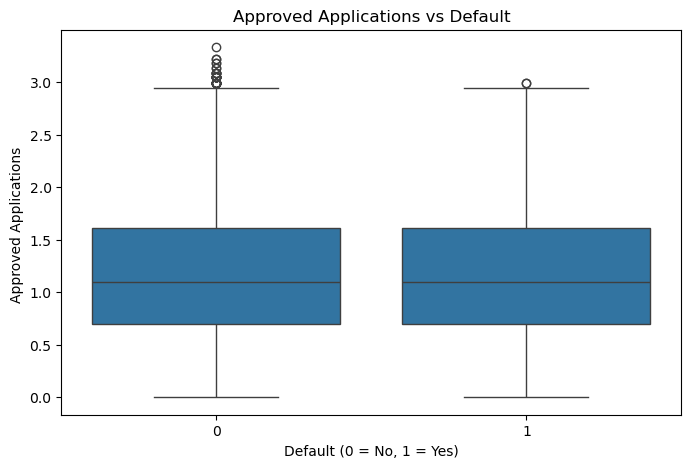

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x="TARGET", y=np.log1p(data["approved_apps"]), data=data)
plt.title("Approved Applications vs Default")
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel("Approved Applications ")
plt.show()

Non-defaulters generally have more previously approved applications.

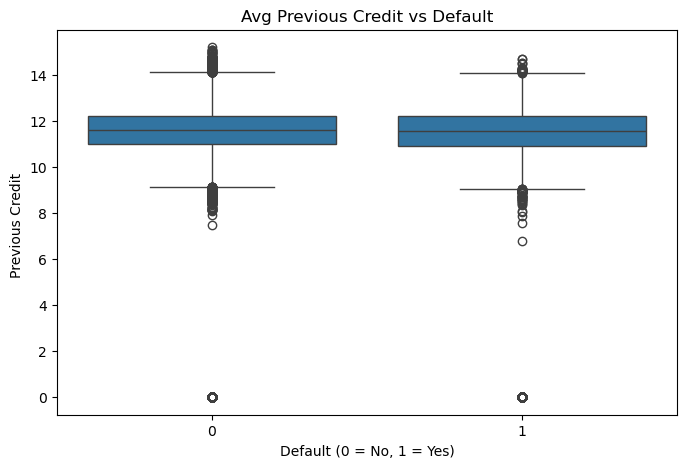

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x="TARGET", y=np.log1p(data["avg_prev_credit"]), data=data)
plt.title("Avg Previous Credit vs Default")
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel("Previous Credit ")
plt.show()

In [40]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,active_loans,avg_credit_amount,total_credit_debt,max_overdue_days,has_overdue,total_prev_apps,approved_apps,rejected_apps,avg_prev_credit,avg_prev_annuity
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,108131.945625,245781.0,0.0,0,1.0,1.0,0.0,179055.00,9251.775
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,254350.125000,0.0,0.0,0,3.0,3.0,0.0,484191.00,56553.990
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,94518.900000,0.0,0.0,0,1.0,1.0,0.0,20106.00,5357.250
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.000000,0.0,0.0,0,9.0,5.0,1.0,291695.50,23651.175
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,146250.000000,0.0,0.0,0,6.0,6.0,0.0,166638.75,12278.805


DATA PREPROCESSING

In [41]:
(data == 'unknown').sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
total_prev_apps       0
approved_apps         0
rejected_apps         0
avg_prev_credit       0
avg_prev_annuity      0
Length: 133, dtype: int64

In [42]:
drop_cols = [
    'SK_ID_CURR',
    'TARGET',
    'avg_credit_amount'
]


In [43]:
# NaN count per column (sorted)
nan_count = data.isna().sum().sort_values(ascending=False)

# Show only columns with NaNs
nan_count[nan_count > 0]


COMMONAREA_MODE             214865
COMMONAREA_AVG              214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 62, dtype: int64

In [44]:
data.fillna(0, inplace=True)


In [45]:
data.isna().sum().sum()


np.int64(0)

In [46]:
# Separate features
X = data.drop(columns=['TARGET', 'SK_ID_CURR'])
y = data['TARGET']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

print("Categorical columns:", len(cat_cols))
print("Numerical columns:", len(num_cols))


Categorical columns: 16
Numerical columns: 115


In [47]:
X[cat_cols] = X[cat_cols].astype(str)


In [48]:
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,active_loans,avg_credit_amount,total_credit_debt,max_overdue_days,has_overdue,total_prev_apps,approved_apps,rejected_apps,avg_prev_credit,avg_prev_annuity
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,108131.945625,245781.00,0.0,0,1.0,1.0,0.0,179055.00,9251.775000
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1.0,254350.125000,0.00,0.0,0,3.0,3.0,0.0,484191.00,56553.990000
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,94518.900000,0.00,0.0,0,1.0,1.0,0.0,20106.00,5357.250000
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,0.000000,0.00,0.0,0,9.0,5.0,1.0,291695.50,23651.175000
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,146250.000000,0.00,0.0,0,6.0,6.0,0.0,166638.75,12278.805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0.0,0.000000,0.00,0.0,0,1.0,1.0,0.0,40455.00,6605.910000
307507,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,...,0.0,0.000000,0.00,0.0,0,1.0,1.0,0.0,56821.50,10074.465000
307508,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,2.0,990000.000000,1795833.00,0.0,0,2.0,2.0,0.0,20625.75,4770.405000
307509,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,0.0,45000.000000,0.00,0.0,0,2.0,2.0,0.0,134439.75,10681.132500


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression


In [50]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])


In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


In [52]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'active_loans', 'avg_credit_amount',...
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object'))])

In [53]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000))
])


In [54]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'ac...
                                                  Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [56]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'ac...
                                                  Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

In [57]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,active_loans,avg_credit_amount,total_credit_debt,max_overdue_days,has_overdue,total_prev_apps,approved_apps,rejected_apps,avg_prev_credit,avg_prev_annuity
181648,Cash loans,F,N,N,2,90000.0,227520.0,13189.5,180000.0,Unaccompanied,...,2.0,113580.00,146637.0,0.0,0,5.0,5.0,0.0,138673.800000,11235.222000
229245,Cash loans,M,Y,Y,0,90000.0,161730.0,13095.0,135000.0,Unaccompanied,...,0.0,0.00,0.0,0.0,0,6.0,4.0,1.0,78769.500000,9427.518000
122525,Cash loans,M,N,Y,0,135000.0,728847.0,26307.0,553500.0,"Spouse, partner",...,2.0,274812.75,378688.5,0.0,0,1.0,1.0,0.0,45598.500000,12991.005000
306311,Cash loans,M,N,N,0,135000.0,474183.0,34636.5,391500.0,Unaccompanied,...,0.0,399285.00,0.0,0.0,0,8.0,6.0,2.0,126723.937500,11620.935000
300658,Cash loans,F,N,Y,0,180000.0,254700.0,27558.0,225000.0,Unaccompanied,...,0.0,0.00,0.0,0.0,0,2.0,1.0,1.0,13965.750000,3102.615000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31304,Revolving loans,F,N,Y,1,135000.0,405000.0,20250.0,405000.0,Unaccompanied,...,0.0,0.00,0.0,0.0,0,1.0,1.0,0.0,68809.500000,7643.340000
121193,Cash loans,F,N,N,0,157500.0,272520.0,21528.0,225000.0,Unaccompanied,...,2.0,180180.00,256887.0,13.0,1,14.0,4.0,5.0,64651.821429,4779.205000
248504,Cash loans,F,N,N,0,90000.0,246357.0,24493.5,234000.0,Unaccompanied,...,2.0,171000.00,0.0,0.0,0,4.0,4.0,0.0,140610.375000,12703.331250
175469,Cash loans,F,N,Y,0,112500.0,810000.0,26901.0,810000.0,Children,...,0.0,67500.00,0.0,0.0,0,8.0,5.0,2.0,343011.937500,24668.440714


In [58]:
y_predict = pipe.predict(X_test)

In [59]:

y_predict


array([0, 0, 1, ..., 0, 1, 1])

In [60]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_predict))

0.6933482919532381


In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[39329 17209]
 [ 1651  3314]]


In [62]:
pd.crosstab(y_test,y_predict)

col_0,0,1
TARGET,,
0,39329,17209
1,1651,3314


In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_predict))

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_predict))

# Confusion matrix
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", cm)

Accuracy: 0.6933482919532381
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.70      0.81     56538
           1       0.16      0.67      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.90      0.69      0.76     61503

Confusion Matrix:
 [[39329 17209]
 [ 1651  3314]]


In loan default prediction, false negatives (defaulters predicted as non-defaulters) pose a higher financial risk to the bank compared to false positives. Therefore, recall for the defaulter class is considered more important than precision. The logistic regression model achieves a recall of 67% for defaulters, indicating reasonable risk identification, although precision remains low, leading to rejection of some creditworthy applicants.

RANDOM FOREST

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])


In [66]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'ac...
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        n_jobs=-1, random_state=42))])

In [67]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'ac...
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        n_jobs=-1, random_state=42))])

In [68]:
y_predict=pipe.predict(X_test)

In [69]:
y_predict

array([0, 0, 0, ..., 0, 0, 1])

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_predict))

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_predict))

# Confusion matrix
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8236996569273044
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90     56538
           1       0.21      0.42      0.28      4965

    accuracy                           0.82     61503
   macro avg       0.58      0.64      0.59     61503
weighted avg       0.88      0.82      0.85     61503

Confusion Matrix:
 [[48580  7958]
 [ 2885  2080]]


Although Random Forest achieved higher overall accuracy, Logistic Regression demonstrated superior recall in identifying defaulters. Since minimizing loan defaults is critical in credit risk management, Logistic Regression was selected as the preferred model.

XG BOOST

In [71]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    
    random_state=42
)


In [72]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb)
])


In [73]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'ac...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [74]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'ac...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [75]:
y_predict=pipe.predict(X_test)

In [76]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_predict))

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_predict))

# Confusion matrix
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9199226054013625
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.63      0.02      0.04      4965

    accuracy                           0.92     61503
   macro avg       0.77      0.51      0.50     61503
weighted avg       0.90      0.92      0.88     61503

Confusion Matrix:
 [[56479    59]
 [ 4866    99]]


Although XGBoost achieved higher overall accuracy, Logistic Regression demonstrated higher recall for defaulters, making it more suitable for credit risk assessment where minimizing loan defaults is critical.

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        solver='liblinear'
    ))
])

param_grid = {
    'model__C': [0.1, 1, 10]   # keep it SMALL
}

grid = GridSearchCV(
    pipe_lr,
    param_grid,
    scoring='recall',   # important for your problem
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best C:", grid.best_params_)
print("Best Recall:", grid.best_score_)


Best C: {'model__C': 0.1}
Best Recall: 0.6764350453172204


CONCLUSION

Multiple classification models were evaluated for loan default prediction. Although tree-based models such as Random Forest and XGBoost achieved higher overall accuracy, Logistic Regression demonstrated the highest recall for defaulters. Hyperparameter tuning using GridSearchCV further improved its performance, with the optimal regularization parameter (C = 0.1) achieving a recall of approximately 67%. Since minimizing loan defaults is more critical than maximizing accuracy in credit risk assessment, Logistic Regression was selected as the final model.

CHALLENGES AND TECHNIQUES

The dataset contained a large number of records and features, especially after merging multiple files and applying one-hot encoding, which increased computational complexity and training time.
Efficient preprocessing pipelines were used, and simpler models such as Logistic Regression were preferred over more complex models to ensure reasonable training time and stability.

Efficient preprocessing pipelines were used, and simpler models such as Logistic Regression were preferred over more complex models to ensure reasonable training time and stability.

The target variable was highly imbalanced, with significantly fewer defaulters compared to non-defaulters, which could bias the model toward the majority class.

Several columns contained missing values due to incomplete credit history or unavailable records from external sources.
Missing numerical values were imputed using suitable strategies (such as zero or median values), while categorical variables were handled through preprocessing pipelines.

Missing numerical values were imputed using suitable strategies (such as zero or median values), while categorical variables were handled through preprocessing pipelines.